In [1]:
import tensorflow as tf
from keras.datasets import cifar10

In [2]:
(X_train1,y_train1), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
X_train = X_train1[0:45000]
y_train = y_train1[0:45000]
X_valid = X_train1[45000:]
y_valid = y_train1[45000:]

In [4]:
print("X_train shape: ",  X_train.shape)
print("X_valid shape: ", X_valid.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_valid shape: ", y_valid.shape)
print("X_test shape: ",y_test.shape)

X_train shape:  (45000, 32, 32, 3)
X_valid shape:  (5000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
y_train shape:  (45000, 1)
y_valid shape:  (5000, 1)
X_test shape:  (10000, 1)


In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [6]:
disp_ind = []
for i in range(10):
  disp_ind.append(np.random.randint(0, X_train.shape[0]))

disp_ind

[36666, 38586, 40536, 29990, 4661, 9854, 15962, 11642, 37057, 17205]

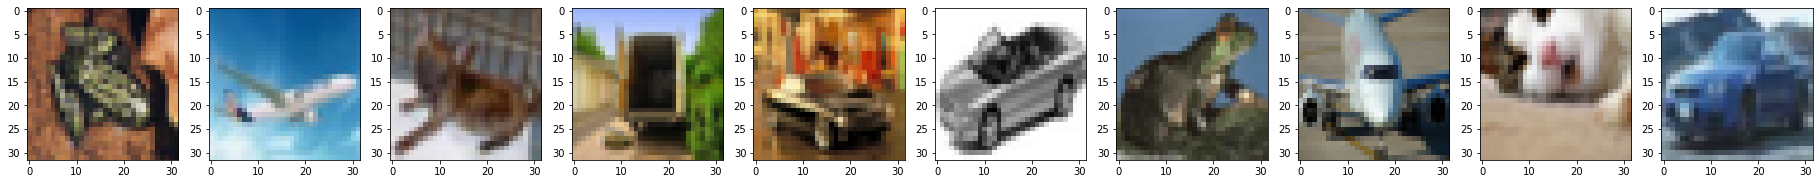

In [7]:
fig,ax = plt.subplots(1,10,figsize=(32,32))
for i in range(len(disp_ind)):
  ax[i].imshow(X_train[disp_ind[i]])

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_ohe = to_categorical(y_train)
print(y_train_ohe.shape)
y_valid_ohe = to_categorical(y_valid)
print(y_valid_ohe.shape)
y_test_ohe = to_categorical(y_test)
print(y_test_ohe.shape)

(45000, 10)
(5000, 10)
(10000, 10)


In [10]:
X_train_flt = X_train.astype(float)
X_valid_flt = X_valid.astype(float)
X_test_flt = X_test.astype(float)

X_train_norm = X_train_flt/255
X_valid_norm = X_valid_flt/255
X_test_norm = X_test_flt/255

print("X_train shape: ",X_train_norm.shape)
print("X_valid shape: ",X_valid_norm.shape)
print("X_test shape: ",X_test_norm.shape)

X_train shape:  (45000, 32, 32, 3)
X_valid shape:  (5000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


In [11]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/20
1407/1407 [==============================] - 15s 5ms/step - loss: 1.3437 - accuracy: 0.5163 - val_loss: 1.0900 - val_accuracy: 0.6142
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9342 - accuracy: 0.6681 - val_loss: 0.9702 - val_accuracy: 0.6628
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6990 - accuracy: 0.7534 - val_loss: 0.9005 - val_accuracy: 0.6948
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4657 - accuracy: 0.8374 - val_loss: 0.9576 - val_accuracy: 0.6992
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2769 - accuracy: 0.9049 - val_loss: 1.1994 - val_accuracy: 0.6838
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1630 - accuracy: 0.9442 - val_loss: 1.3814 - val_accuracy: 0.6844
Epoch 7/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1151 - accuracy: 0.9599 - val_loss: 1.6545 - val_accuracy

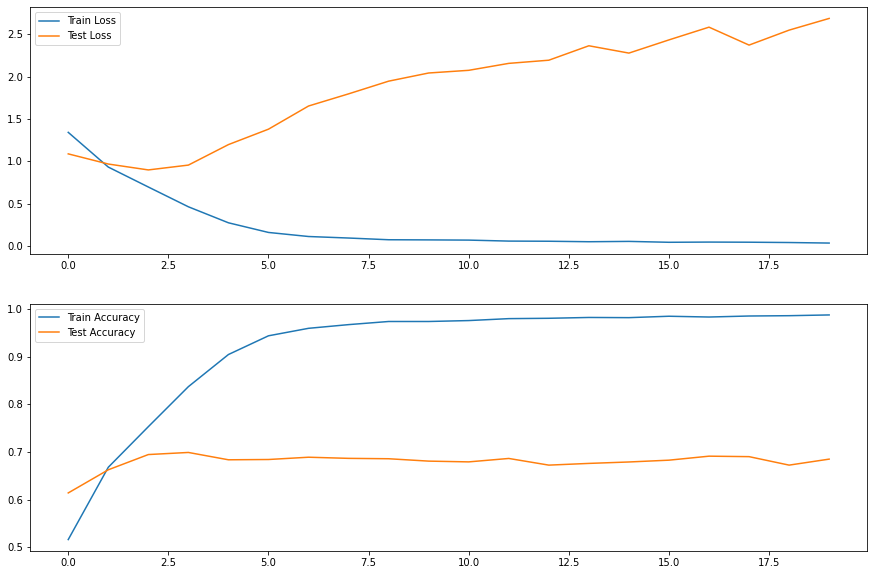

In [13]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


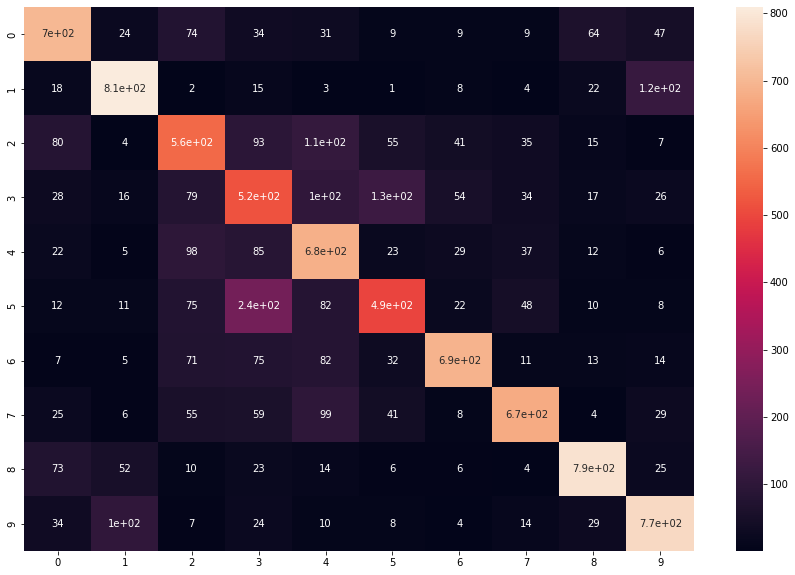

In [14]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 2 VGG blocks and trained on train dataset

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4129 - accuracy: 0.4872 - val_loss: 1.1294 - val_accuracy: 0.5960
Epoch 2/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.9373 - accuracy: 0.6668 - val_loss: 0.8574 - val_accuracy: 0.7022
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7119 - accuracy: 0.7492 - val_loss: 0.7881 - val_accuracy: 0.7284
Epoch 4/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.5371 - accuracy: 0.8126 - val_loss: 0.8136 - val_accuracy: 0.7406
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3858 - accuracy: 0.8628 - val_loss: 0.8307 - val_accuracy: 0.7476
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2630 - accuracy: 0.9080 - val_loss: 0.9997 - val_accuracy: 0.7408
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1910 - accuracy: 0.9329 - val_loss: 1.1009 - val_accuracy:

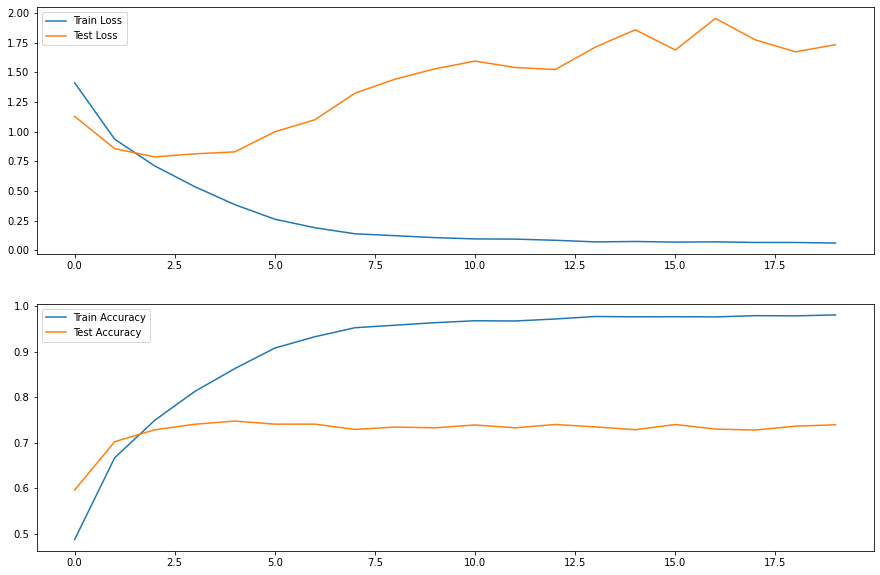

In [16]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


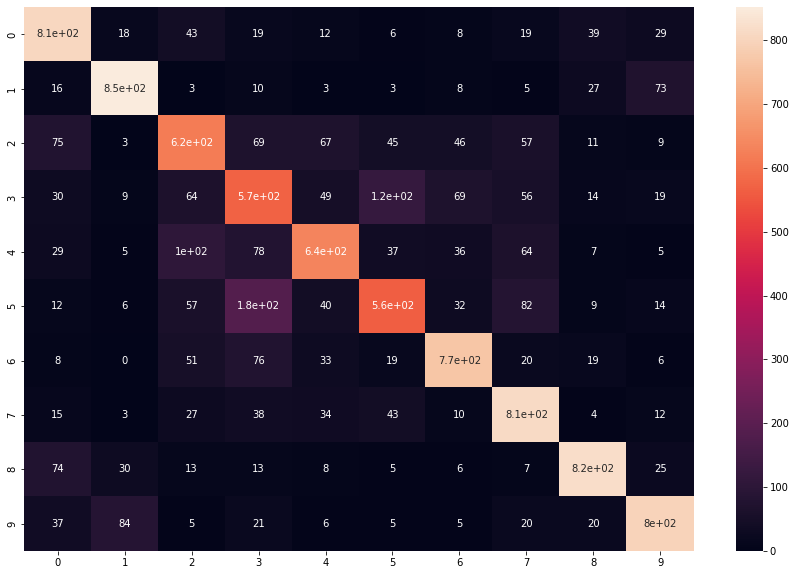

In [17]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 3 VGG blocks and trained on train dataset

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5382 - accuracy: 0.4326 - val_loss: 1.1841 - val_accuracy: 0.5736
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0384 - accuracy: 0.6301 - val_loss: 0.9601 - val_accuracy: 0.6632
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8360 - accuracy: 0.7041 - val_loss: 0.8051 - val_accuracy: 0.7196
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6997 - accuracy: 0.7551 - val_loss: 0.7625 - val_accuracy: 0.7358
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5948 - accuracy: 0.7895 - val_loss: 0.7123 - val_accuracy: 0.7598
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5081 - accuracy: 0.8199 - val_loss: 0.7468 - val_accuracy: 0.7552
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4245 - accuracy: 0.8510 - val_loss: 0.7765 - val_accuracy:

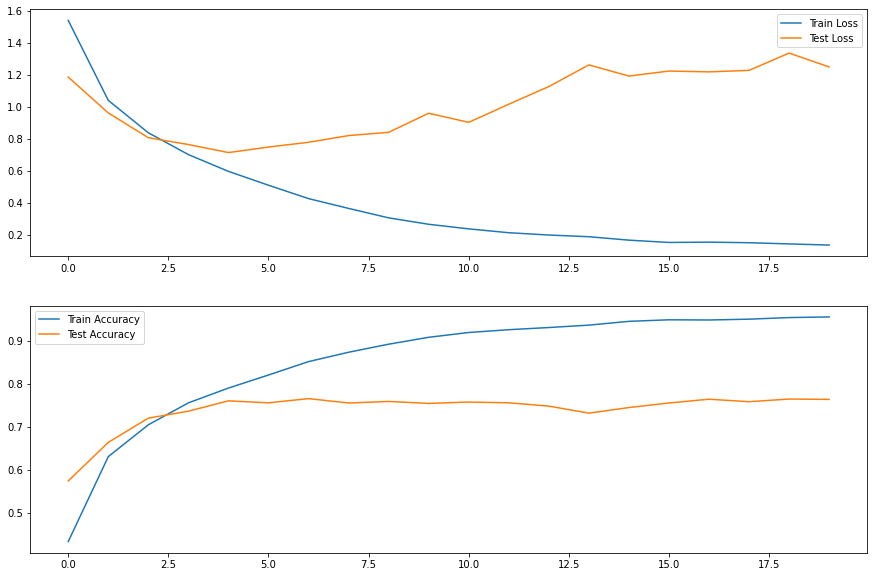

In [19]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


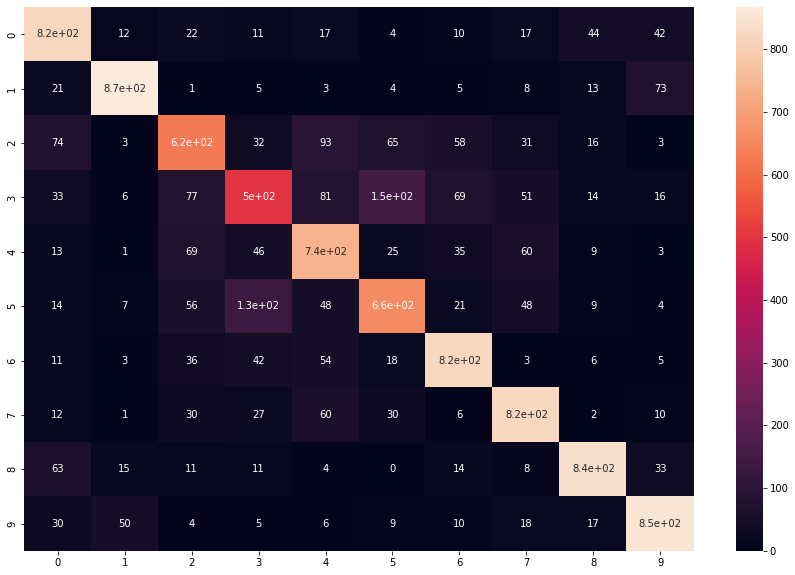

In [20]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.2 and trained on train dataset

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/50
1407/1407 [==============================] - 11s 7ms/step - loss: 2.0062 - accuracy: 0.2327 - val_loss: 1.5415 - val_accuracy: 0.4264
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4711 - accuracy: 0.4630 - val_loss: 1.2526 - val_accuracy: 0.5496
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2600 - accuracy: 0.5454 - val_loss: 1.0599 - val_accuracy: 0.6206
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1400 - accuracy: 0.5943 - val_loss: 0.9980 - val_accuracy: 0.6466
Epoch 5/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0504 - accuracy: 0.6283 - val_loss: 0.8797 - val_accuracy: 0.6874
Epoch 6/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9861 - accuracy: 0.6525 - val_loss: 0.8746 - val_accuracy: 0.6918
Epoch 7/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9306 - accuracy: 0.6749 - val_loss: 0.8324 - val_accurac

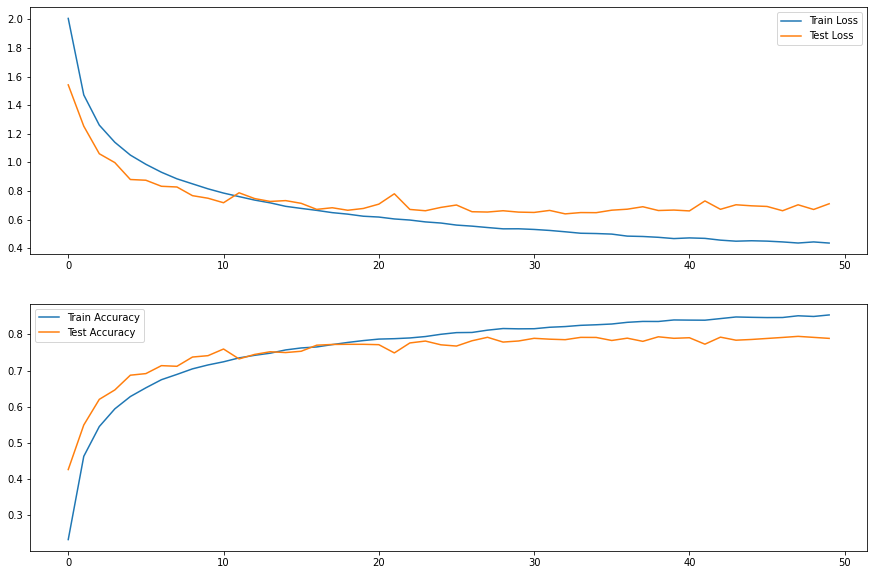

In [22]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


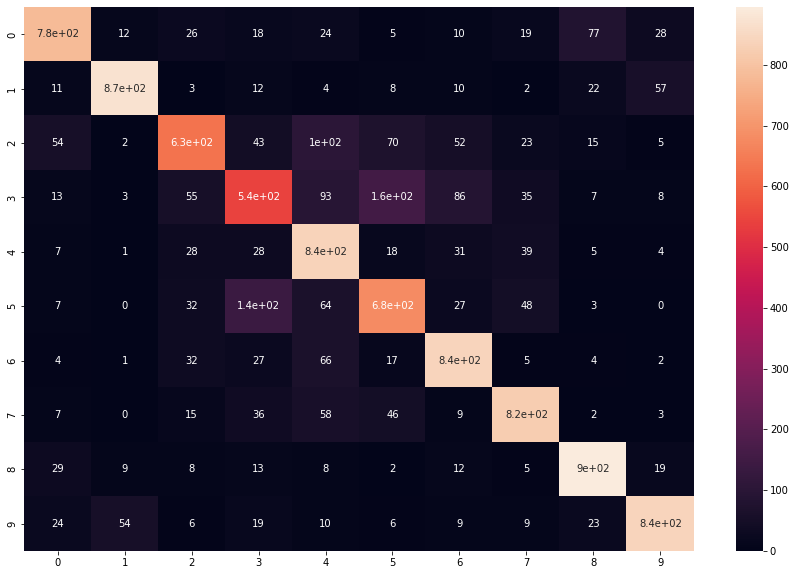

In [23]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.3 and trained on train dataset

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/50
1407/1407 [==============================] - 10s 6ms/step - loss: 1.7186 - accuracy: 0.3574 - val_loss: 1.3874 - val_accuracy: 0.4790
Epoch 2/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3265 - accuracy: 0.5200 - val_loss: 1.0697 - val_accuracy: 0.6138
Epoch 3/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1445 - accuracy: 0.5942 - val_loss: 0.9285 - val_accuracy: 0.6752
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0388 - accuracy: 0.6347 - val_loss: 0.8483 - val_accuracy: 0.7080
Epoch 5/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9676 - accuracy: 0.6651 - val_loss: 0.8286 - val_accuracy: 0.7152
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9143 - accuracy: 0.6831 - val_loss: 0.8309 - val_accuracy: 0.7138
Epoch 7/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8763 - accuracy: 0.6962 - val_loss: 0.7760 - val_accuracy

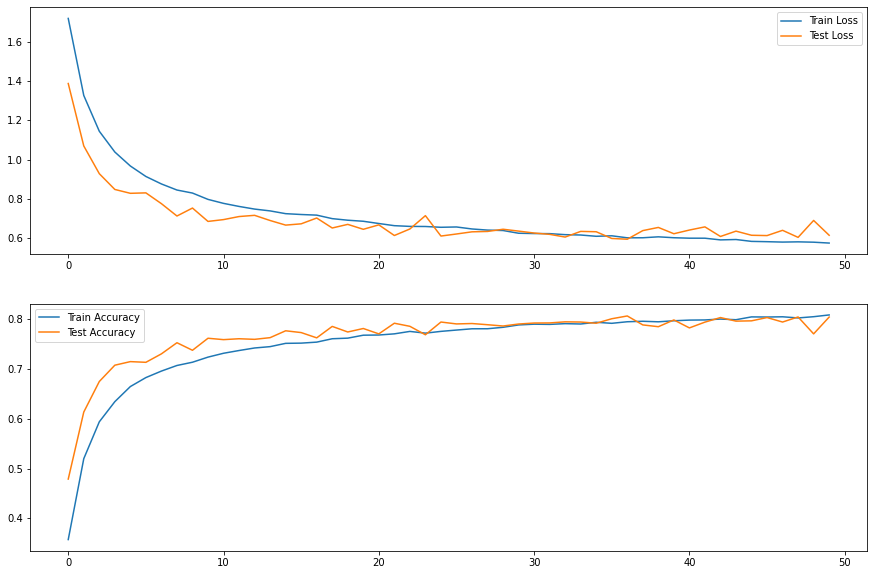

In [25]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


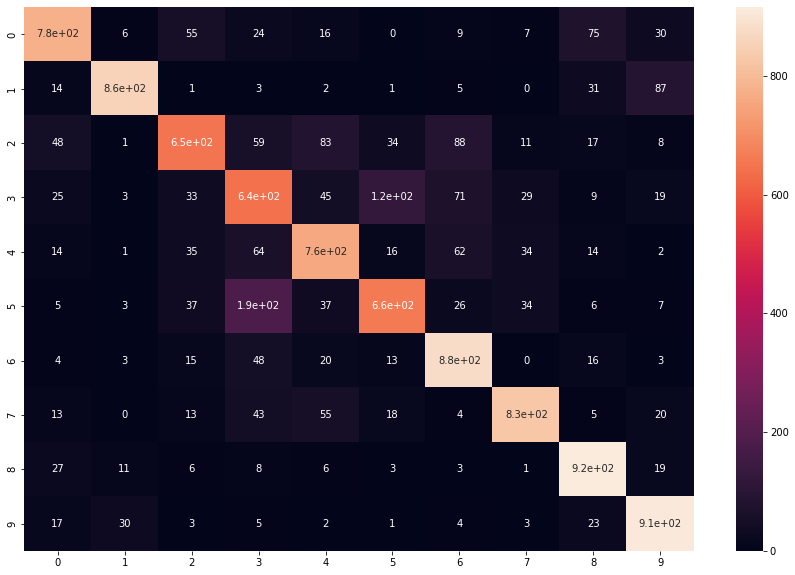

In [26]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.4 and trained on train dataset

In [27]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add((Dropout(0.4)))
model.add(Dense(units=128,activation='relu'))
model.add((Dropout(0.4)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9229 - accuracy: 0.2760 - val_loss: 1.6029 - val_accuracy: 0.4092
Epoch 2/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5168 - accuracy: 0.4434 - val_loss: 1.2559 - val_accuracy: 0.5414
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3572 - accuracy: 0.5096 - val_loss: 1.2320 - val_accuracy: 0.5540
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2672 - accuracy: 0.5478 - val_loss: 1.0554 - val_accuracy: 0.6240
Epoch 5/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1916 - accuracy: 0.5774 - val_loss: 1.0229 - val_accuracy: 0.6336
Epoch 6/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1427 - accuracy: 0.5995 - val_loss: 0.9728 - val_accuracy: 0.6508
Epoch 7/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1066 - accuracy: 0.6134 - val_loss: 0.9192 - val_accurac

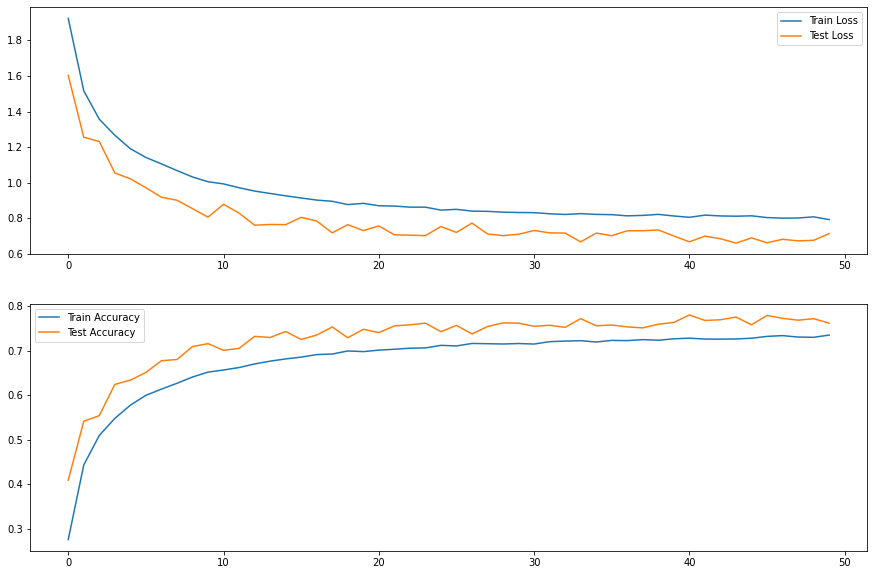

In [28]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


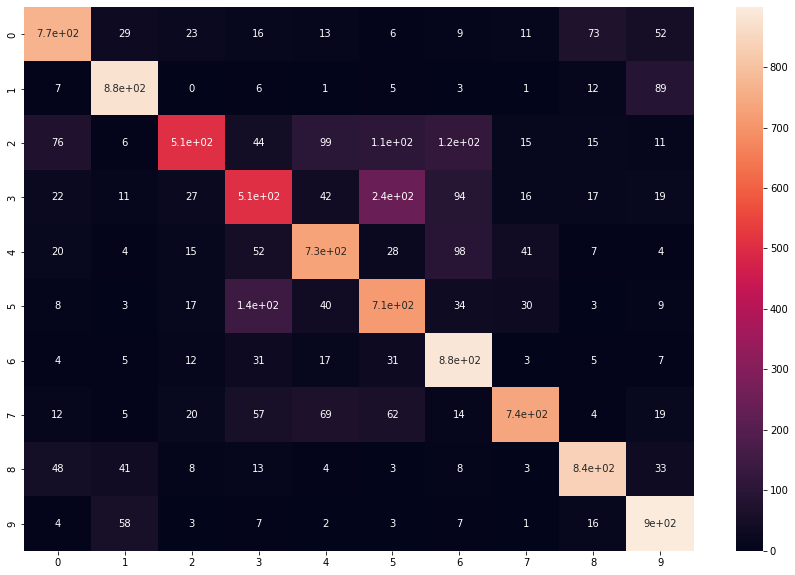

In [29]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# In dropout we got max accuracy at 0.3 as 78.80
# Now adding batch Normalization layer and training on train dataset

In [30]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_valid_norm,y_valid_ohe))

Epoch 1/50
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6860 - accuracy: 0.3867 - val_loss: 1.7553 - val_accuracy: 0.4226
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1805 - accuracy: 0.5888 - val_loss: 1.0975 - val_accuracy: 0.6034
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9779 - accuracy: 0.6656 - val_loss: 0.8983 - val_accuracy: 0.6870
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8713 - accuracy: 0.7043 - val_loss: 0.7451 - val_accuracy: 0.7412
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7961 - accuracy: 0.7329 - val_loss: 0.6874 - val_accuracy: 0.7688
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7266 - accuracy: 0.7548 - val_loss: 0.5970 - val_accuracy: 0.7992
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6773 - accuracy: 0.7731 - val_loss: 0.6779 - val_ac

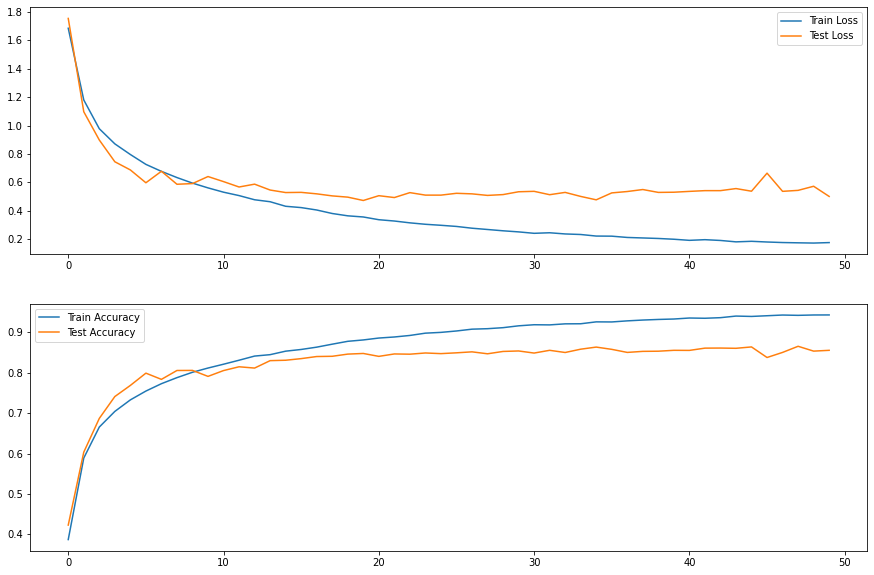

In [31]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 3ms/step


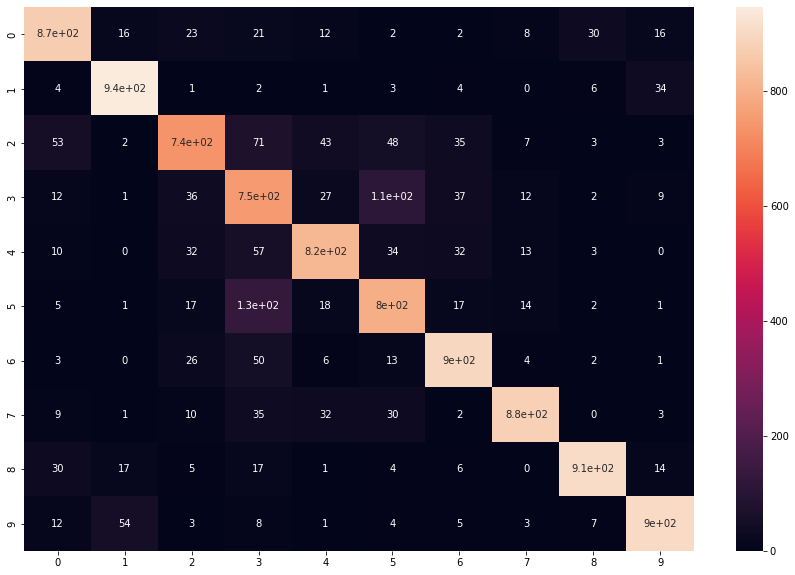

In [32]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding batch normalization improved the accuracy of the model to 84.99 from 78.80

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation on train data and training the model on generated data along with train data

In [34]:
datagen = ImageDataGenerator(height_shift_range=0.2,horizontal_flip=True)
it_train = datagen.flow(X_train_norm, y_train_ohe, batch_size=32)
history = model.fit(it_train, epochs=50, validation_data=(X_valid_norm, y_valid_ohe))

Epoch 1/50
1407/1407 [==============================] - 28s 19ms/step - loss: 0.6162 - accuracy: 0.8017 - val_loss: 0.4649 - val_accuracy: 0.8488
Epoch 2/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.5540 - accuracy: 0.8187 - val_loss: 0.4996 - val_accuracy: 0.8414
Epoch 3/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.5297 - accuracy: 0.8263 - val_loss: 0.4516 - val_accuracy: 0.8596
Epoch 4/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.5087 - accuracy: 0.8312 - val_loss: 0.4236 - val_accuracy: 0.8604
Epoch 5/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4972 - accuracy: 0.8363 - val_loss: 0.4270 - val_accuracy: 0.8622
Epoch 6/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.4957 - accuracy: 0.8363 - val_loss: 0.4394 - val_accuracy: 0.8556
Epoch 7/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4758 - accuracy: 0.8434 - val_loss: 0.4378 -

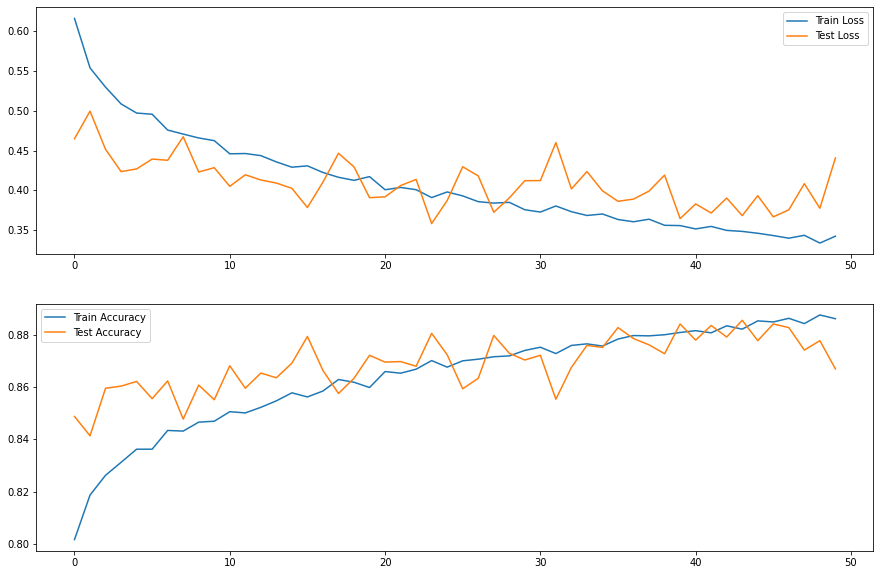

In [35]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 3ms/step


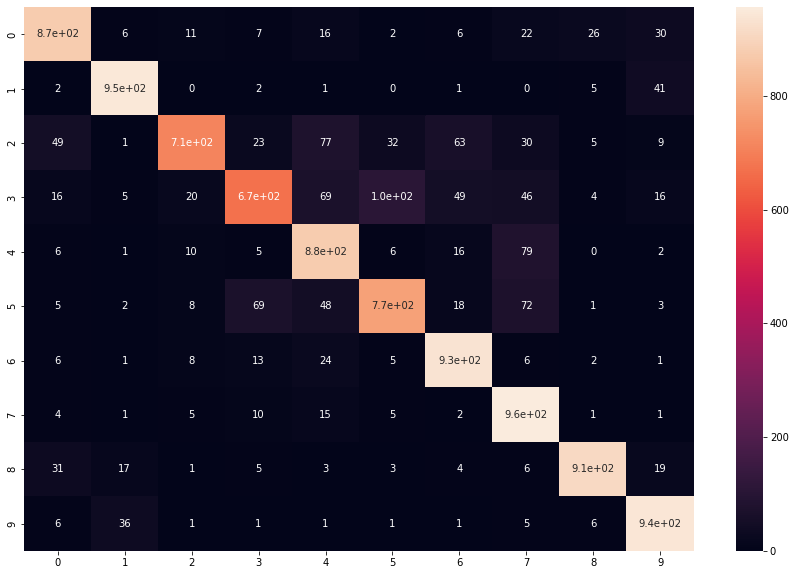

In [36]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Data Augmentation futher improved the accuracy of the model to 85.95 from 84.99